Todo junto:

<ipython-input-2-6fab219860e7>:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


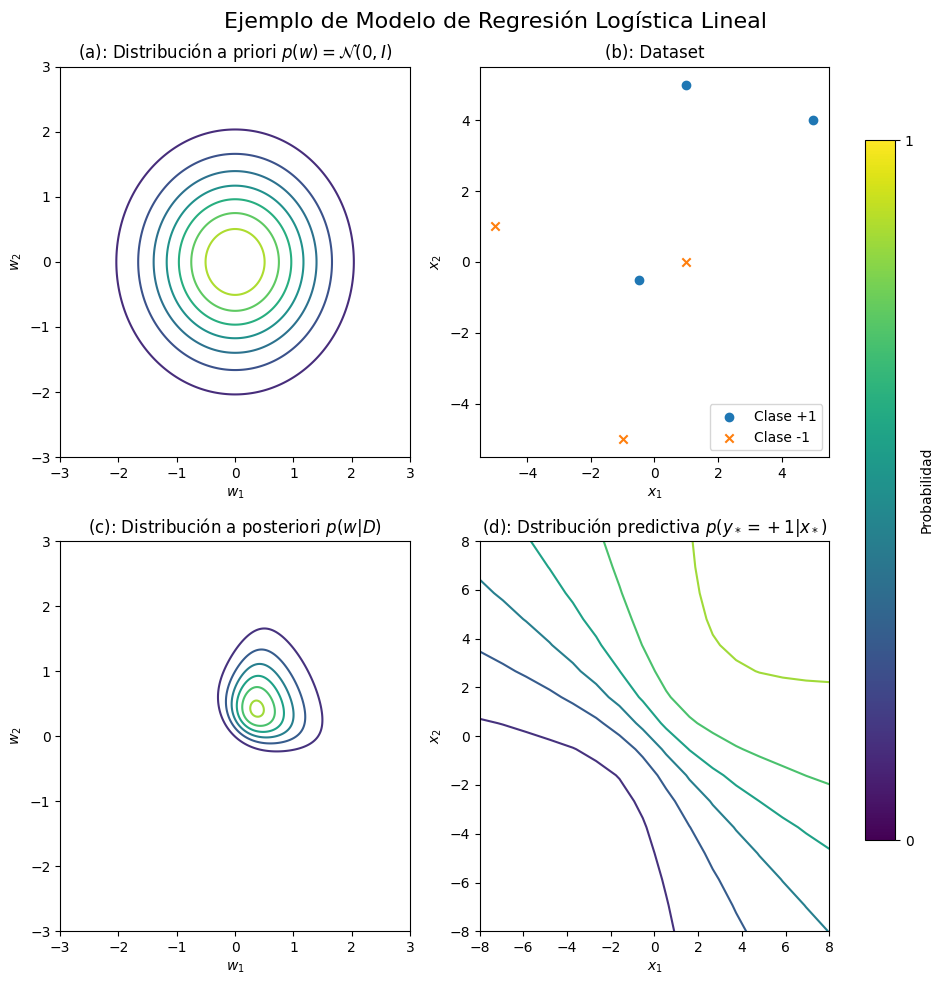

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Puntos de entrenamiento y sus clases
train_X = np.array([[5, 4], [1, 5], [-0.5, -0.5], [1, 0], [-5, 1], [-1, -5]])
train_Y = np.array([1, 1, 1, -1, -1, -1])

# Configuración de la figura
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Ejemplo de Modelo de Regresión Logística Lineal', fontsize=16)

# Panel (a): Contornos de la distribución a priori p(w) = N(0, I)
w = np.linspace(-3, 3, 500)
W1, W2 = np.meshgrid(w, w)
prior = multivariate_normal([0, 0], [[1, 0], [0, 1]])
Z = prior.pdf(np.dstack((W1, W2)))
axes[0, 0].contour(W1, W2, Z)
axes[0, 0].set_title('(a): Distribución a priori $p(w) = \mathcal{N}(0, I)$')
axes[0, 0].set_xlabel('$w_1$')
axes[0, 0].set_ylabel('$w_2$')

# Panel (b): Datos del conjunto, con círculos indicando clase +1 y cruces indicando clase -1
axes[0, 1].scatter(train_X[train_Y == 1][:, 0], train_X[train_Y == 1][:, 1], marker='o', label='Clase +1')
axes[0, 1].scatter(train_X[train_Y == -1][:, 0], train_X[train_Y == -1][:, 1], marker='x', label='Clase -1')
axes[0, 1].set_title('(b): Dataset')
axes[0, 1].set_xlabel('$x_1$')
axes[0, 1].set_ylabel('$x_2$')
axes[0, 1].legend(loc='lower right')

# Panel (c): Contornos de la distribución a posteriori p(w|D)
# Se usa la expresión 3.6 del libro, 3.4 en mi trabajo.
K = 1
Sigma_inv = np.linalg.inv(prior.cov)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def posterior_fun(w, X, y):
    w = np.array(w)
    # Calcular -1/2 * w^T * Sigma^{-1} * w
    ps = np.exp(-0.5 * (w.T @ Sigma_inv @ w))

    log_sum = 0
    for i in range(len(y)):
        dot_product = np.dot(X[i], w)  # Calcular x_i^T * w
        log_sum += np.log(sigmoid(y[i] * dot_product))  # Calcular log(sigmoid(y_i * dot_product))

    ss = np.exp(log_sum)  # Calcular la exponencial de la suma

    result = K * ps * ss  # Calcular el producto de los dos
    return result

posterior_vals = np.zeros_like(W1)
for i in range(len(w)):
    for j in range(len(w)):
        posterior_vals[j, i] = posterior_fun([w[i], w[j]], train_X, train_Y)

axes[1, 0].contour(W1, W2, posterior_vals)
axes[1, 0].set_title('(c): Distribución a posteriori $p(w|D)$')
axes[1, 0].set_xlabel('$w_1$')
axes[1, 0].set_ylabel('$w_2$')


# Panel (d): Contornos de la distribución predictiva p(y* = +1 | x*)
from scipy.integrate import quad
from scipy.integrate import dblquad
x = np.linspace(-8, 8, 16)
X1, X2 = np.meshgrid(x, x)

def integrand(w0, w1, x0, x1):
    w = np.array([w0, w1])
    x_est = np.array([x0, x1])
    inner_product = np.dot(x_est, w)
    return sigmoid(inner_product) * posterior_fun(w, train_X, train_Y)

def predict_fun(x0, x1, X, y):
    result, error = dblquad(
        lambda w1, w0: integrand(w0, w1, x0, x1),
        -5, 5,
        lambda w0: -5, lambda w0: 5
    )
    return result

predict_vals = np.zeros_like(X1)
for i in range(len(x)):
    for j in range(len(x)):
        predict_vals[j, i] = predict_fun(x[i], x[j], train_X, train_Y)

axes[1, 1].contour(X1, X2, predict_vals)
axes[1, 1].set_title('(d): Dstribución predictiva $p(y_* = +1 | x_*)$')
axes[1, 1].set_xlabel('$x_1$')
axes[1, 1].set_ylabel('$x_2$')


# Añadir una única barra de color a la derecha sin interferir
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])
norm = plt.Normalize(vmin=0, vmax=1)  # Normalizar la escala de color de 0 a 1
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, ticks=[0, 1], label='Probabilidad')


plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()









Por partes:

<ipython-input-19-043f9356c923>:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


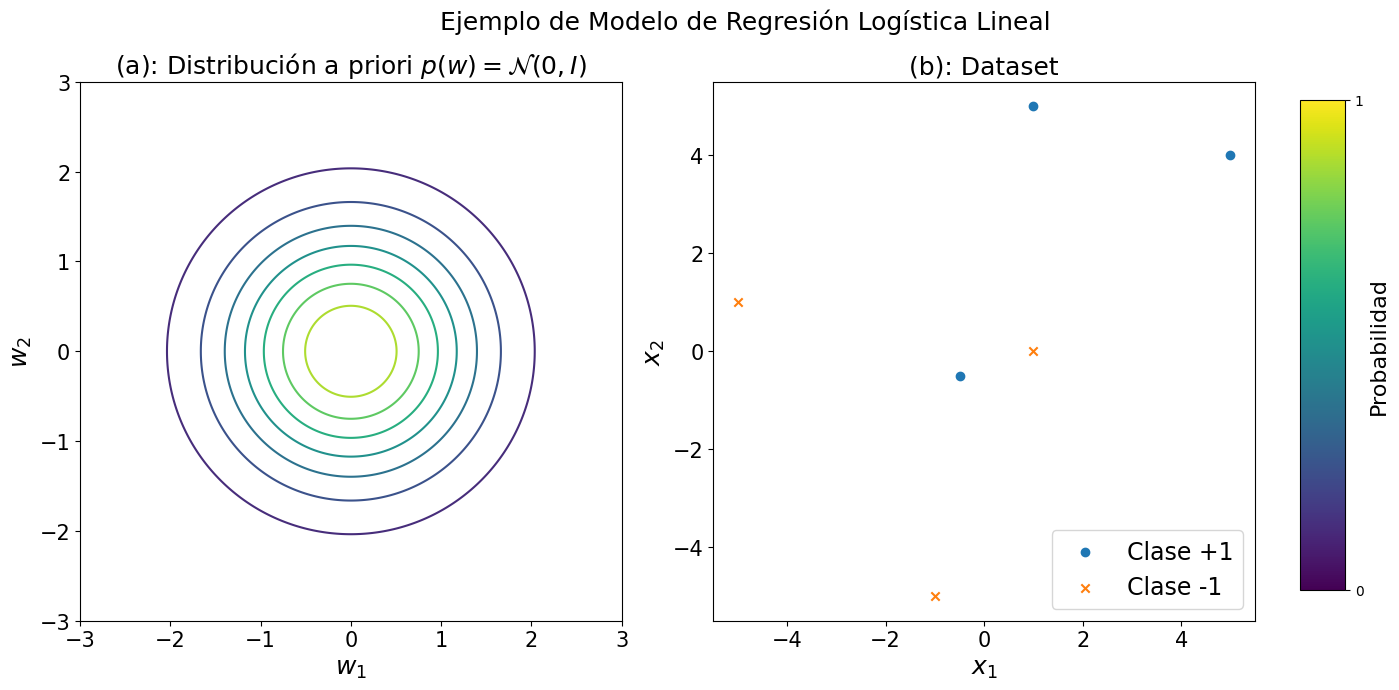

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Puntos de entrenamiento y sus clases
train_X = np.array([[5, 4], [1, 5], [-0.5, -0.5], [1, 0], [-5, 1], [-1, -5]])
train_Y = np.array([1, 1, 1, -1, -1, -1])

# Configuración de la figura
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Ejemplo de Modelo de Regresión Logística Lineal', fontsize=18)

# Panel (a): Contornos de la distribución a priori p(w) = N(0, I)
w = np.linspace(-3, 3, 500)
W1, W2 = np.meshgrid(w, w)
prior = multivariate_normal([0, 0], [[1, 0], [0, 1]])
Z = prior.pdf(np.dstack((W1, W2)))
axes[0].contour(W1, W2, Z)
axes[0].set_title('(a): Distribución a priori $p(w) = \mathcal{N}(0, I)$', fontsize=18)
axes[0].set_xlabel('$w_1$', fontsize=18)
axes[0].set_ylabel('$w_2$', fontsize=18)

# Panel (b): Datos del conjunto, con círculos indicando clase +1 y cruces indicando clase -1
axes[1].scatter(train_X[train_Y == 1][:, 0], train_X[train_Y == 1][:, 1], marker='o', label='Clase +1')
axes[1].scatter(train_X[train_Y == -1][:, 0], train_X[train_Y == -1][:, 1], marker='x', label='Clase -1')
axes[1].set_title('(b): Dataset', fontsize=18)
axes[1].set_xlabel('$x_1$', fontsize=18)
axes[1].set_ylabel('$x_2$', fontsize=18)
axes[1].legend(loc='lower right', fontsize=17)

# Añadir una única barra de color a la derecha sin interferir
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])
norm = plt.Normalize(vmin=0, vmax=1)  # Normalizar la escala de color de 0 a 1
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, ticks=[0, 1], label='Probabilidad')
cbar.ax.yaxis.label.set_fontsize(16)


axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


<ipython-input-20-93119fc454d3>:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


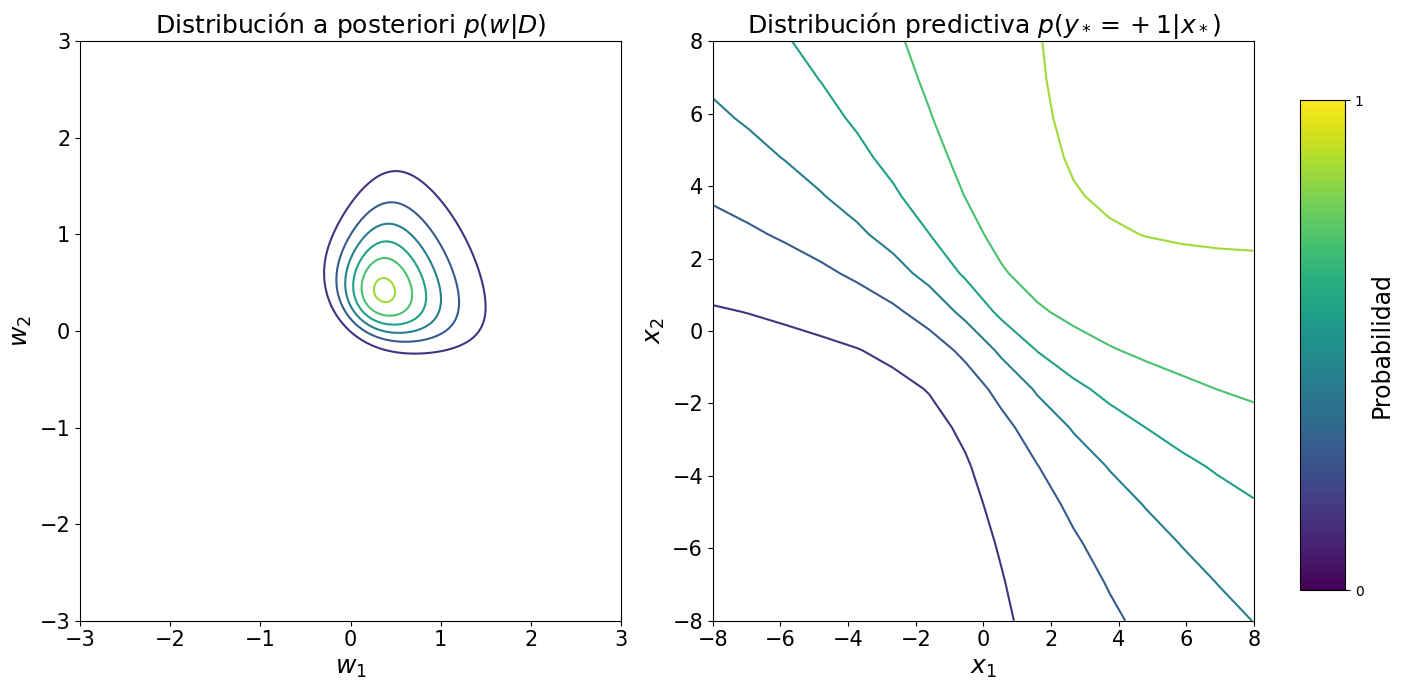

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Puntos de entrenamiento y sus clases
train_X = np.array([[5, 4], [1, 5], [-0.5, -0.5], [1, 0], [-5, 1], [-1, -5]])
train_Y = np.array([1, 1, 1, -1, -1, -1])

# Configuración de la figura
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
#fig.suptitle('Ejemplo de Modelo de Regresión Logística Lineal', fontsize=16)

# Panel (a): Contornos de la distribución a priori p(w) = N(0, I)
w = np.linspace(-3, 3, 500)
W1, W2 = np.meshgrid(w, w)
prior = multivariate_normal([0, 0], [[1, 0], [0, 1]])
Z = prior.pdf(np.dstack((W1, W2)))

# Panel (c): Contornos de la distribución a posteriori p(w|D)
# Se usa la expresión 3.6 del libro, 3.4 en mi trabajo.
K = 1
Sigma_inv = np.linalg.inv(prior.cov)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def posterior_fun(w, X, y):
    w = np.array(w)
    # Calcular -1/2 * w^T * Sigma^{-1} * w
    ps = np.exp(-0.5 * (w.T @ Sigma_inv @ w))

    log_sum = 0
    for i in range(len(y)):
        dot_product = np.dot(X[i], w)  # Calcular x_i^T * w
        log_sum += np.log(sigmoid(y[i] * dot_product))  # Calcular log(sigmoid(y_i * dot_product))

    ss = np.exp(log_sum)  # Calcular la exponencial de la suma

    result = K * ps * ss  # Calcular el producto de los dos
    return result

posterior_vals = np.zeros_like(W1)
for i in range(len(w)):
    for j in range(len(w)):
        posterior_vals[j, i] = posterior_fun([w[i], w[j]], train_X, train_Y)

axes[0].contour(W1, W2, posterior_vals)
axes[0].set_title('Distribución a posteriori $p(w|D)$', fontsize=18)
axes[0].set_xlabel('$w_1$', fontsize=18)
axes[0].set_ylabel('$w_2$', fontsize=18)


# Panel (d): Contornos de la distribución predictiva p(y* = +1 | x*)
from scipy.integrate import quad
from scipy.integrate import dblquad
x = np.linspace(-8, 8, 16)
X1, X2 = np.meshgrid(x, x)

def integrand(w0, w1, x0, x1):
    w = np.array([w0, w1])
    x_est = np.array([x0, x1])
    inner_product = np.dot(x_est, w)
    return sigmoid(inner_product) * posterior_fun(w, train_X, train_Y)

def predict_fun(x0, x1, X, y):
    result, error = dblquad(
        lambda w1, w0: integrand(w0, w1, x0, x1),
        -5, 5,
        lambda w0: -5, lambda w0: 5
    )
    return result

predict_vals = np.zeros_like(X1)
for i in range(len(x)):
    for j in range(len(x)):
        predict_vals[j, i] = predict_fun(x[i], x[j], train_X, train_Y)

axes[1].contour(X1, X2, predict_vals)
axes[1].set_title('Distribución predictiva $p(y_* = +1 | x_*)$', fontsize=18)
axes[1].set_xlabel('$x_1$', fontsize=18)
axes[1].set_ylabel('$x_2$', fontsize=18)

axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)


# Añadir una única barra de color a la derecha sin interferir
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])
norm = plt.Normalize(vmin=0, vmax=1)  # Normalizar la escala de color de 0 a 1
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, ticks=[0, 1], label='Probabilidad')
cbar.ax.yaxis.label.set_fontsize(17)


plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

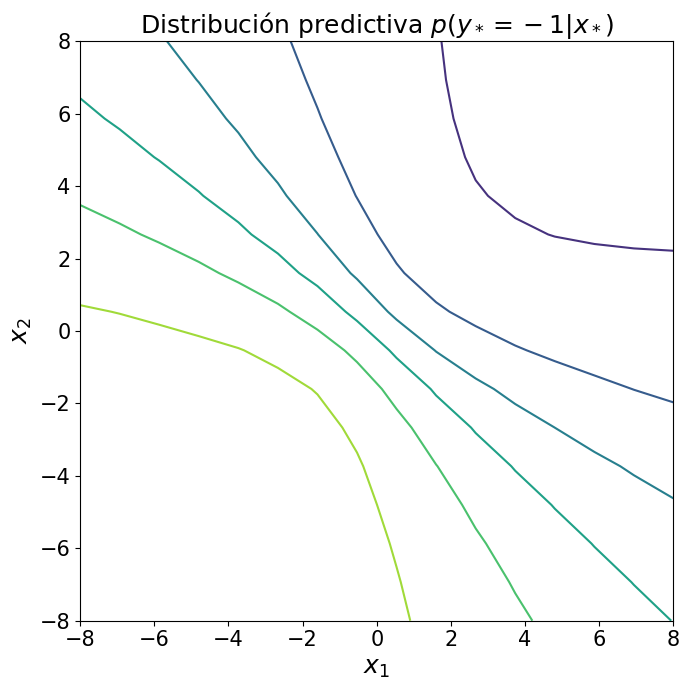

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.integrate import dblquad

# Puntos de entrenamiento y sus clases
train_X = np.array([[5, 4], [1, 5], [-0.5, -0.5], [1, 0], [-5, 1], [-1, -5]])
train_Y = np.array([1, 1, 1, -1, -1, -1])

# Configuración de la figura
fig, axes = plt.subplots(figsize=(7, 7))

#Contornos de la distribución predictiva p(y* = -1 | x*)
def integrand2(w0, w1, x0, x1):
    w = np.array([w0, w1])
    x_est = np.array([x0, x1])
    inner_product = np.dot(x_est, w)
    return 1 - (1 / (1 + np.exp(-inner_product))) * posterior_fun(w, train_X, train_Y)

def predict_fun2(x0, x1, X, y):
    result, error = dblquad(
        lambda w1, w0: integrand2(w0, w1, x0, x1),
        -5, 5,
        lambda w0: -5, lambda w0: 5
    )
    return result

x = np.linspace(-8, 8, 16)
X1, X2 = np.meshgrid(x, x)
predict_vals2 = np.zeros_like(X1)
for i in range(len(x)):
    for j in range(len(x)):
        predict_vals2[j, i] = predict_fun2(x[i], x[j], train_X, train_Y)

axes.contour(X1, X2, predict_vals2)
axes.set_title('Distribución predictiva $p(y_* = -1 | x_*)$', fontsize=18)
axes.set_xlabel('$x_1$', fontsize=18)
axes.set_ylabel('$x_2$', fontsize=18)

axes.tick_params(axis='both', which='major', labelsize=15)

# Ajustes de la figura
plt.tight_layout()
plt.show()
